In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
from library import centered_subplots

import os
import gc
import json
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
ESSENCE_DATA = 'essence-bent'

In [5]:
ALL_POOLS = [2697765, 2697600, 2697585, 2697647, 2697588]
NICK = {2697585: 'E100', 2697600: 'E30', 2697765: 'E5', 2697647: 'B30', 2697588: 'T5'}

GRID_KWARGS = dict(visible=True, lw=.7, ls=":", alpha=.5)

# Price Bending

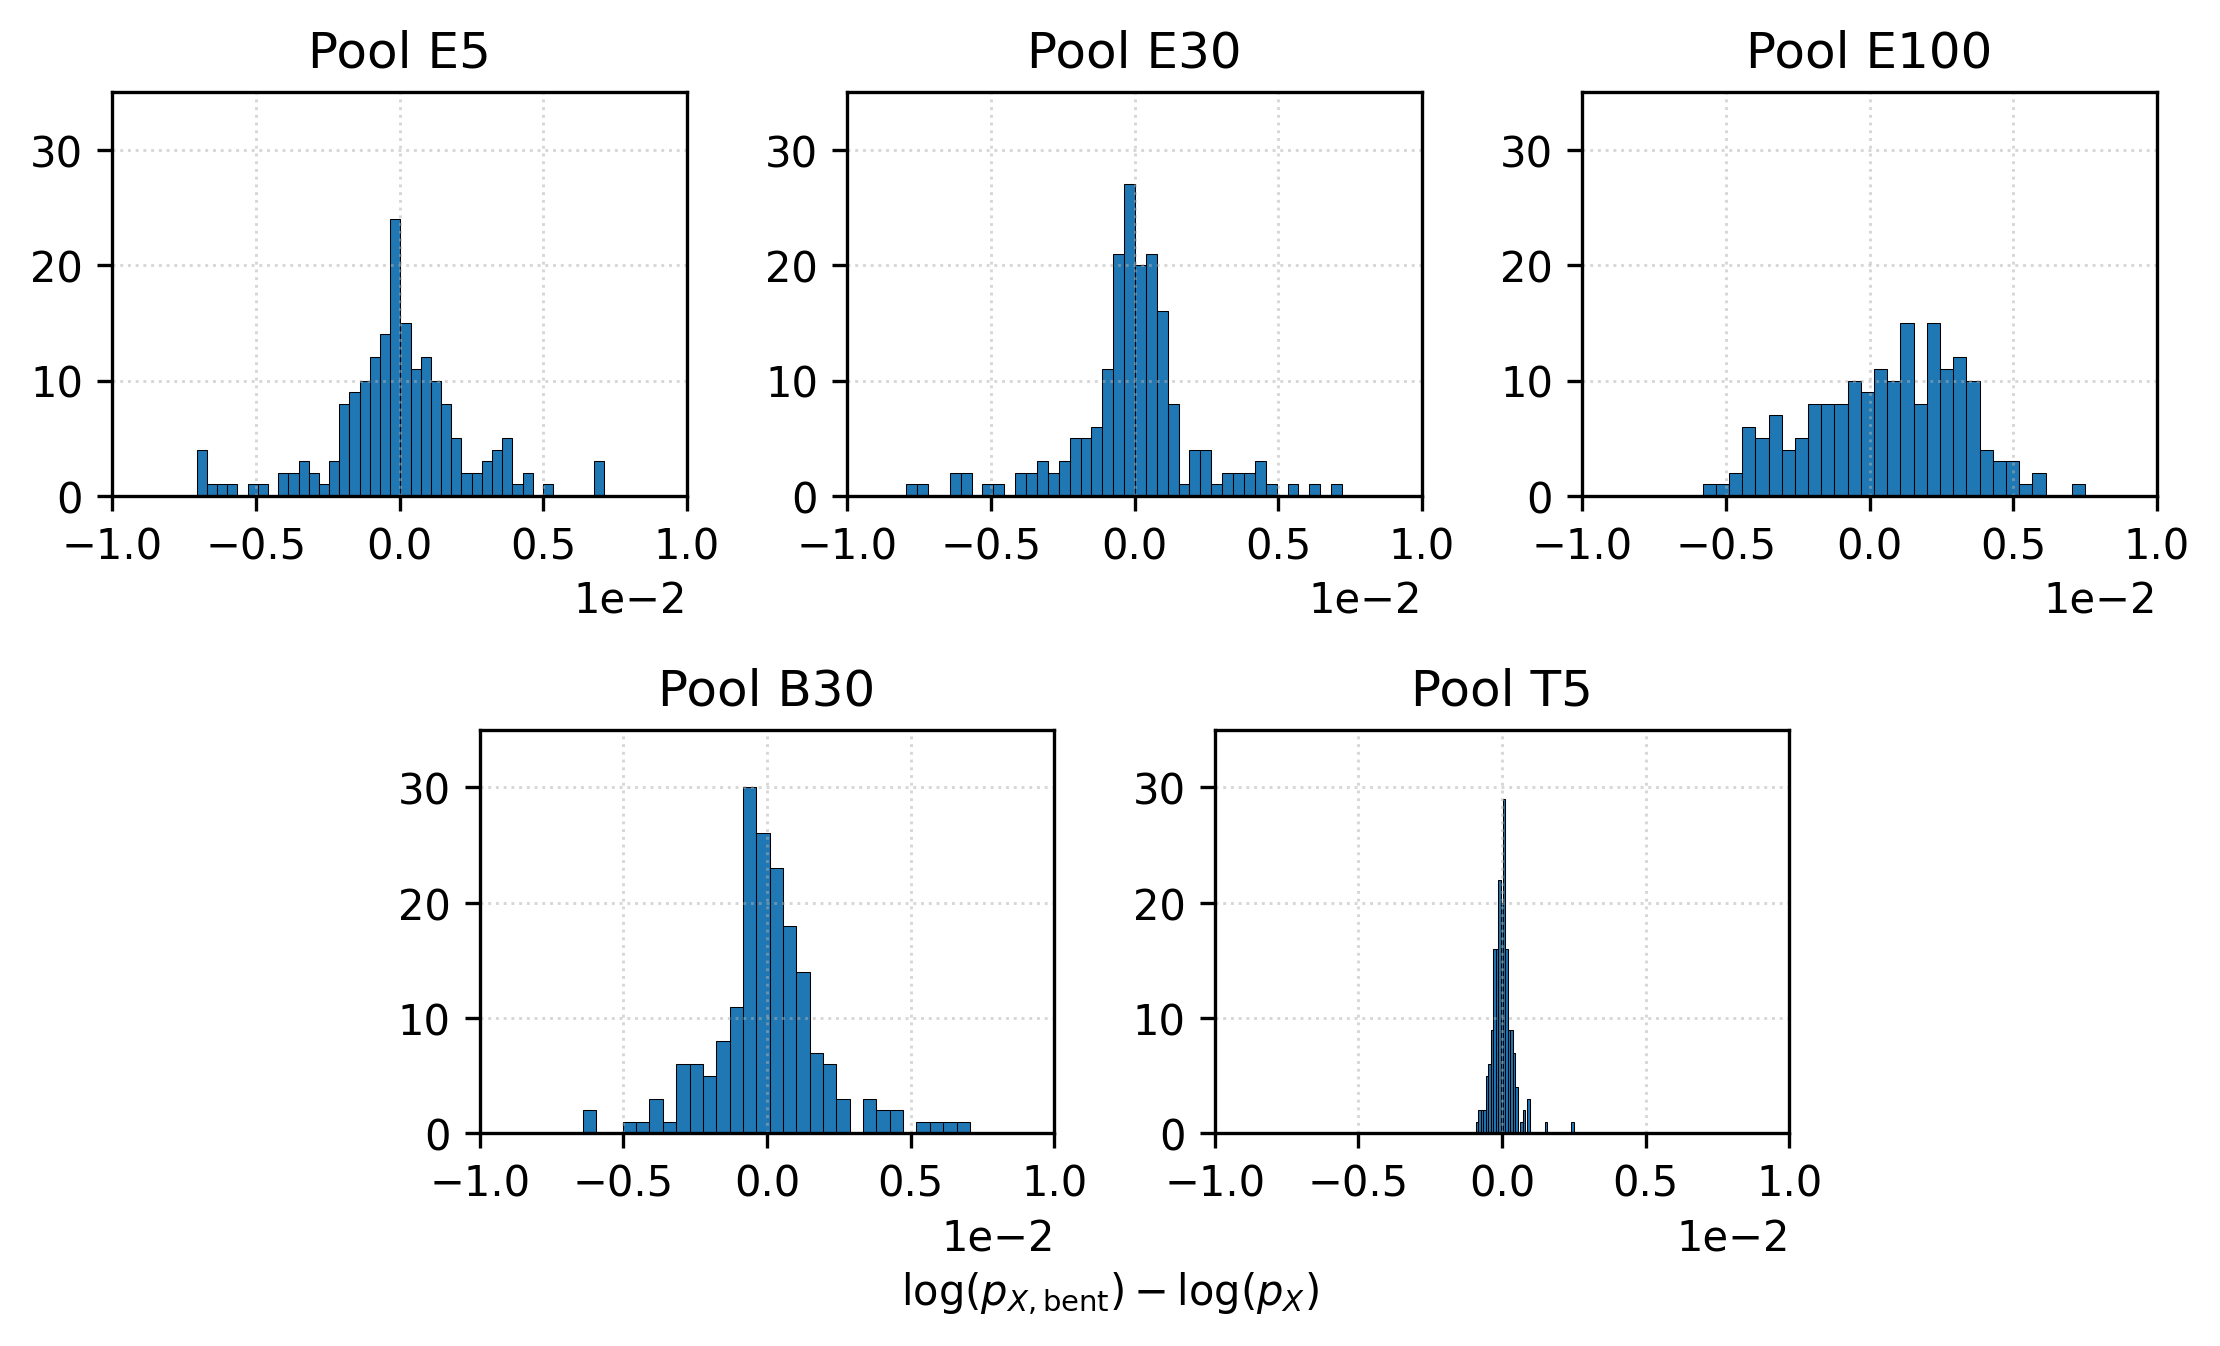

In [22]:
fig, axs = centered_subplots(nplots=len(ALL_POOLS), ncols=3, width=2.5, height=2.2, dpi=300)

for i, pid in enumerate(ALL_POOLS):
    xdiff = []
    for filename in os.listdir(f'dynamics/{pid}-archive'):
        if filename.startswith('gamedata') and filename.endswith('.json'):
            with open(f'dynamics/{pid}-archive/{filename}', 'r') as f:
                data = json.load(f)
                xdiff.append(np.log(data['usd0'][0]) - np.log(data['usd0_raw'][0]))

    ax: plt.Axes = axs[i]
    ax.set_title(f'Pool {NICK[pid]}')
    ax.hist(xdiff, bins=40, density=False, ec='k', lw=.25)
    ax.set_xlim(-.01, .01)
    ax.set_ylim(0, 35)
    ax.grid(**GRID_KWARGS)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

xlab = fig.text(x=.5, y=0, s=r'$\log(p_{X, \mathsf{bent}}) - \log(p_X)$', ha='center')
fig.tight_layout()
fig.savefig(f'{ESSENCE_DATA}/price-bend.jpg', bbox_inches='tight', bbox_extra_artists=[xlab])
plt.show()
_ = gc.collect()

# I_BR vs I_NE

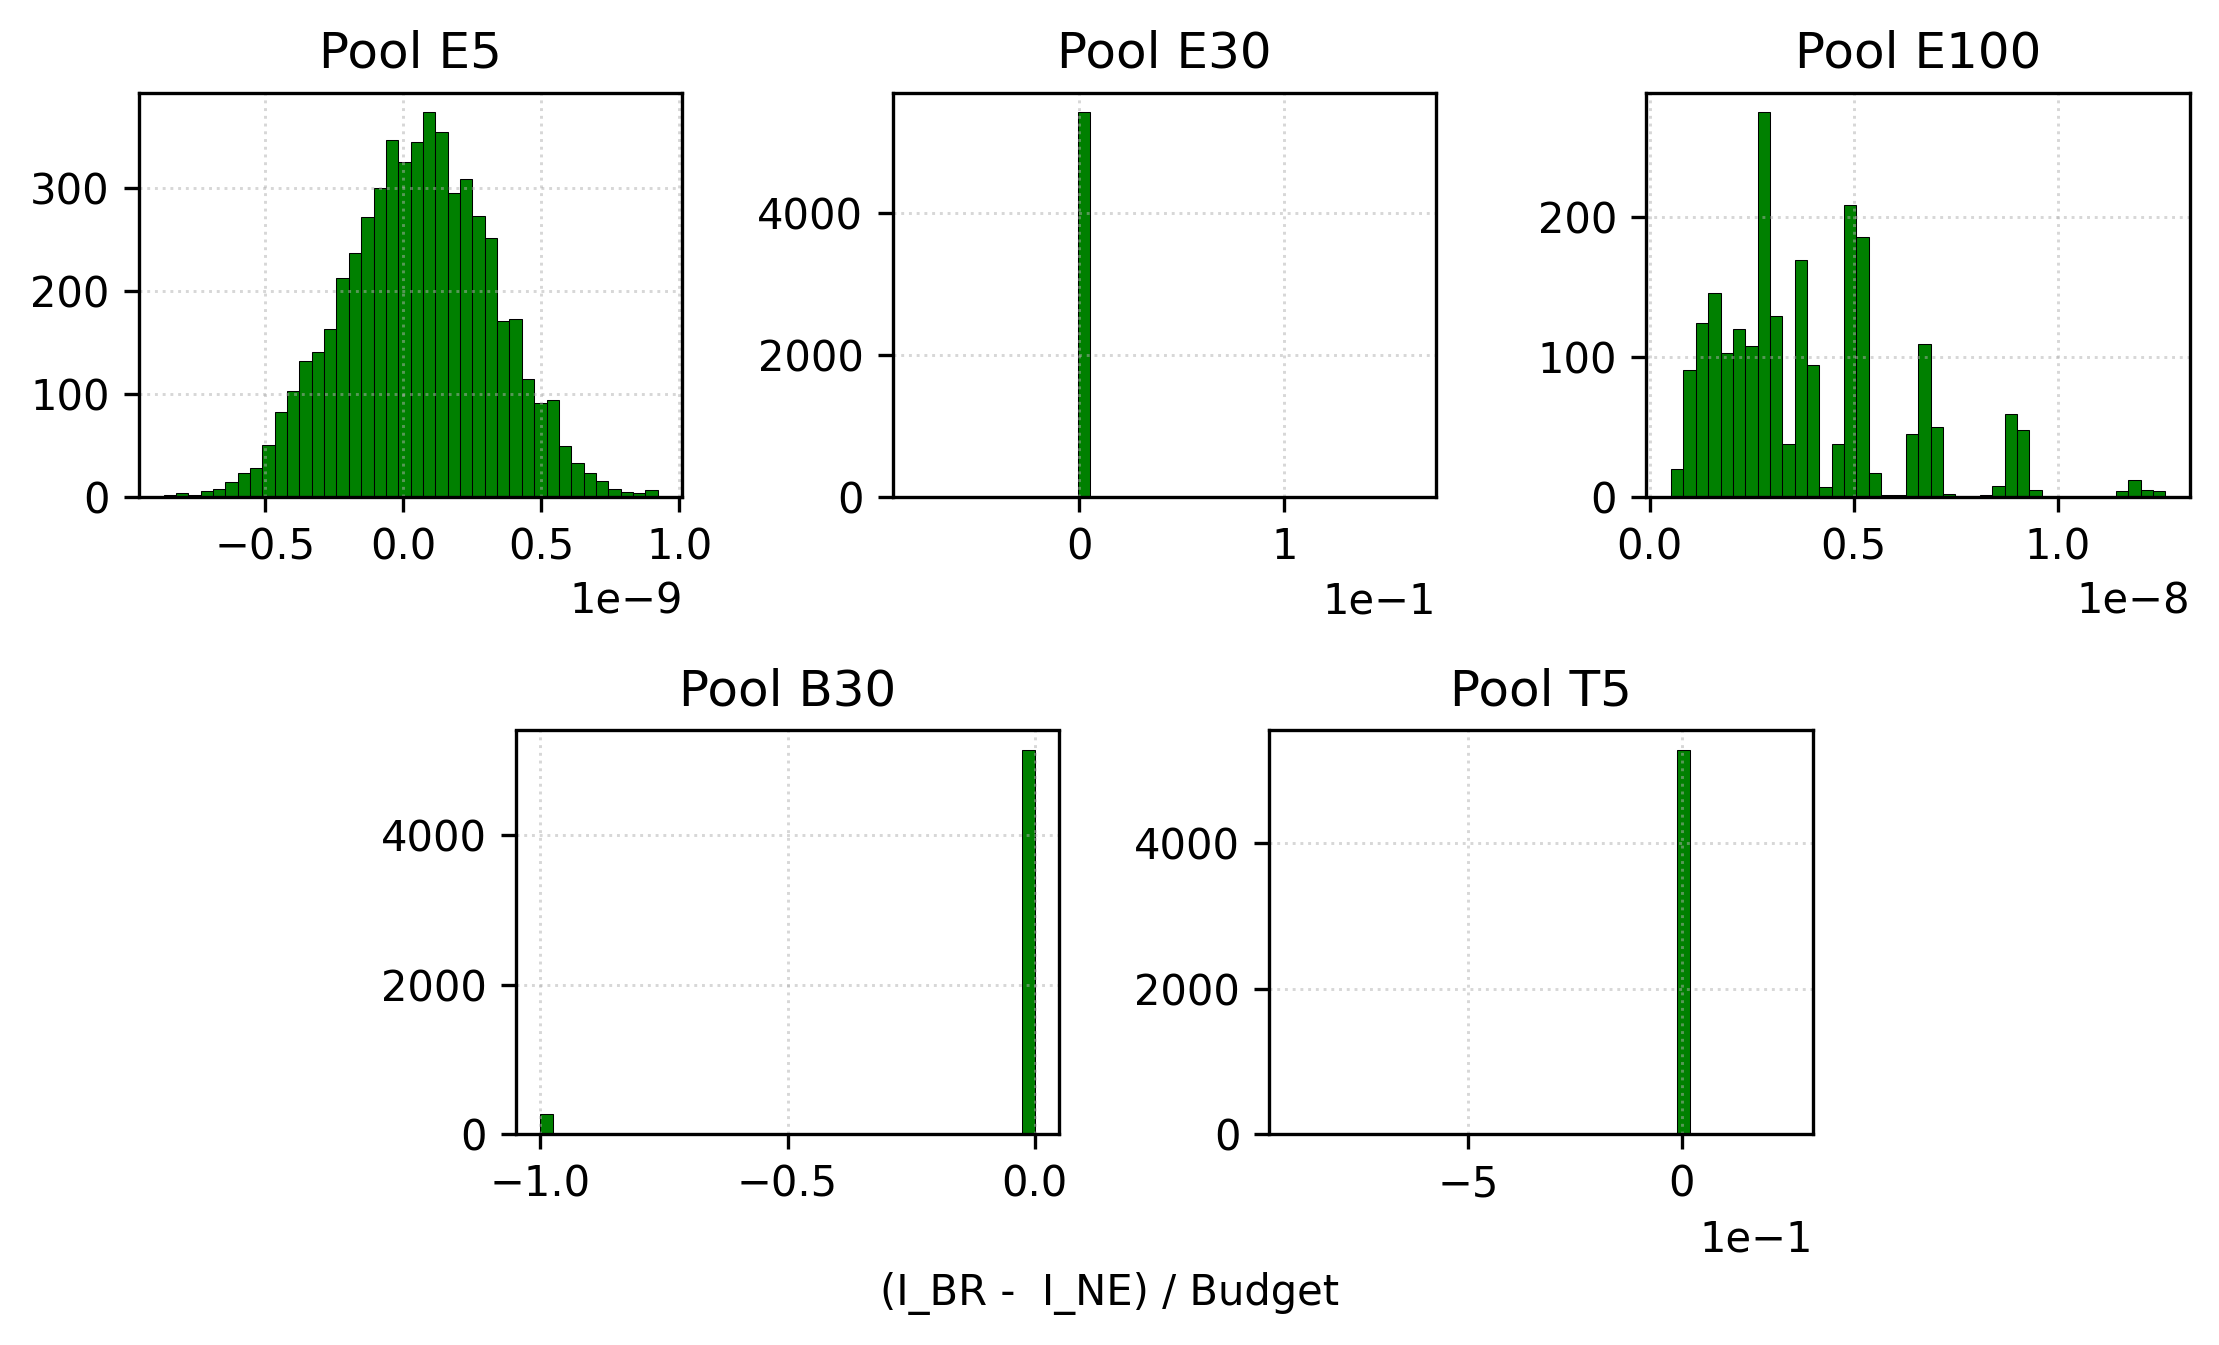

In [21]:
fig, axs = centered_subplots(nplots=len(ALL_POOLS), ncols=3, width=2.5, height=2.2, dpi=300)

for i, pid in enumerate(ALL_POOLS):
    idiff = []
    for filename in os.listdir(f'game/{pid}-archive'):
        if filename.startswith('nash') and filename.endswith('.json'):
            with open(f'game/{pid}-archive/{filename}', 'r') as f:
                data = json.load(f)
            for lp, s in data.items():
                if not lp.startswith('__') and 'I_NE' in s and 'I_BR' in s:
                    idiff.append((s['I_BR']['action'][0]- s['I_NE']['action'][0]) / s['__budget__'])

    ax: plt.Axes = axs[i]
    ax.set_title(f'Pool {NICK[pid]}')
    ax.hist(idiff, bins=40, density=False, ec='k', lw=.25, color=(0, .5, 0))
    ax.grid(**GRID_KWARGS)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

xlab = fig.text(x=.5, y=0, s=r'(I_BR -  I_NE) / Budget', ha='center')
fig.tight_layout()
fig.savefig(f'{ESSENCE_DATA}/ibr-drift.jpg', bbox_inches='tight', bbox_extra_artists=[xlab])
plt.show()
_ = gc.collect()